In [78]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [79]:
def laplacian_of_gaussian(sigma):
    hw = round(3*sigma)    # Half width of kernel
    X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))

    log = ((X**2 + Y**2)/(2*sigma**2) - 1) * np.exp(-(X**2 + Y**2)/(2*sigma**2)) / (np.pi * sigma**4)
    return log

In [80]:
def detect_max(img_log, sigma):
    coordinates = []
    (h, w) = img_log.shape
    k = 1
    for i in range(k, h-k):
        for j in range(k, w-k):
            slice_img = img_log[i-k:i+k+1, j-k:j+k+1]
            result = np.max(slice_img) # finding maximum
            if result >= 0.08: # threshold
                x, y = np.unravel_index(slice_img.argmax(), slice_img.shape)
                coordinates.append((i+x-k, j+y-k)) #finding co-rdinates
    return set(coordinates)

In [81]:
print(laplacian_of_gaussian(3))

[[ 3.87975908e-06  8.79858832e-06  1.78541578e-05  3.24947848e-05
   5.32185854e-05  7.87689374e-05  1.05913834e-04  1.30116494e-04
   1.46831737e-04  1.52794592e-04  1.46831737e-04  1.30116494e-04
   1.05913834e-04  7.87689374e-05  5.32185854e-05  3.24947848e-05
   1.78541578e-05  8.79858832e-06  3.87975908e-06]
 [ 8.79858832e-06  1.95960696e-05  3.89414359e-05  6.92084837e-05
   1.10409391e-04  1.58959539e-04  2.08041461e-04  2.49686214e-04
   2.77271245e-04  2.86874719e-04  2.77271245e-04  2.49686214e-04
   2.08041461e-04  1.58959539e-04  1.10409391e-04  6.92084837e-05
   3.89414359e-05  1.95960696e-05  8.79858832e-06]
 [ 1.78541578e-05  3.89414359e-05  7.54554148e-05  1.30116494e-04
   2.00376949e-04  2.77271245e-04  3.48144280e-04  4.02165372e-04
   4.34379200e-04  4.44844482e-04  4.34379200e-04  4.02165372e-04
   3.48144280e-04  2.77271245e-04  2.00376949e-04  1.30116494e-04
   7.54554148e-05  3.89414359e-05  1.78541578e-05]
 [ 3.24947848e-05  6.92084837e-05  1.30116494e-04  2.15

In [87]:
def detect_blobs(image):
    img1_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) / 255
    fig, axes = plt.subplots(1, 2, figsize = (10, 10))
    axes[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    ax = axes[1]
    ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    patches = []; labels = []; circles = []
    for r in range(1,11):
        sigma = r/1.414
        LOG = sigma**2 * laplacian_of_gaussian(sigma)
        img1_log = np.square(cv.filter2D(img1_gray, -1, LOG))
        coordinates = detect_max(img1_log, sigma)
        for x, y in coordinates:
            radius = sigma * 1.414
            circles.append((x, y, radius))
            c = plt.Circle((y, x), sigma * 1.414, color='blue', linewidth=0.5, fill=False)
            ax.add_patch(c)
        patches.append(c)
        labels.append(f'r = {r}')
        ax.plot()
    ax.set_xlim(0, image.shape[1]); plt.axis('off'); ax.set_title("Image with blobs")
    plt.show() 
    if circles: largest_circle = max(circles, key=lambda c: c[2])  # Find the largest circle by radius
    print(f"Largest circle detected: Center=({largest_circle[0]}, {largest_circle[1]}), Radius={largest_circle[2]}")
    return 

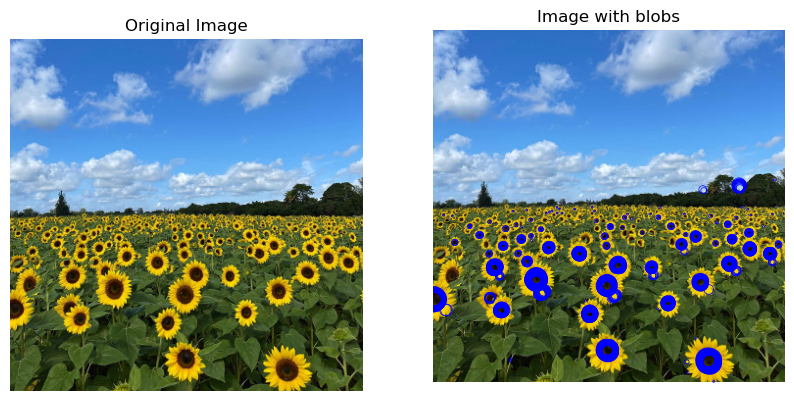

Largest circle detected: Center=(341, 280), Radius=10.0


In [88]:
img1 = cv.imread('../../images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
detect_blobs(img1)